In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from pandas.plotting import lag_plot
from statsmodels.tsa import stattools
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
import statsmodels.api as sm
from utils import *
%matplotlib inline

In [2]:
data = pd.read_csv('SLDC_Data/2017/10/01-10-2017.csv')
data['date'] = '01-10-2017'
data = extract_dt(data)

In [3]:
data.head()

,time,value,date,datetime,hour
0,00:00:00,4019.64,01-10-2017,00:00:00,0
1,00:05:00,3992.69,01-10-2017,00:05:00,0
2,00:10:00,3982.11,01-10-2017,00:10:00,0
3,00:15:00,3944.66,01-10-2017,00:15:00,0
4,00:20:00,3949.66,01-10-2017,00:20:00,0


In [ ]:
data.plot(x='time', y='value', subplots=True, figsize=(20, 10)); plt.legend(loc='best');

In [ ]:
data.plot(x='hour', y='value', subplots=True, figsize=(20, 10)); plt.legend(loc='best');

In [ ]:
day_range = list(range(8, 15))
plot_curves(day_range, 7, 2018)

In [ ]:
day_range = list(range(1, 31))
month_range = list(range(8, 13))
year_range = [2017]
dates = []
values = []

for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                values.append(pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value'].max())
                dates.append('%02d-%02d' % (day, month))
            except:
                pass
        
fig = plt.figure(figsize=(20, 10))

plt.plot(dates, values);
plt.legend(['Per day max values for last year'])
plt.show()

In [ ]:
day_range = list(range(1, 31))
month_range = list(range(1, 13))
year_range = [2017, 2018]
dates = []
values = []

for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                values.append(pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value'].min())
                dates.append('%02d-%02d' % (day, month))
            except:
                pass
        
fig = plt.figure(figsize=(20, 10))
plt.plot(dates, values);
plt.legend(['Per day min values for last year'])
plt.show()

In [ ]:
idx = 100

day_range = list(range(1, 31))
month_range = list(range(7, 8))
year_range = [2018]
dates = []
values = []

for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                values.append(pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date)).iloc[idx]['value'])
                dates.append('%02d-%02d' % (day, month))
            except:
                pass

fig = plt.figure(figsize=(20, 10))
plt.plot(dates, values);
plt.legend(['Per day values at idx = %d for last year' % idx])
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.acorr(values, maxlags=10)
plt.title('Autocorrelation of data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [ ]:
plt.plot(stattools.acf(values, nlags=10))
plt.plot(stattools.pacf(values, nlags=10))


### Prepare data for Exponential smoothing methods

In [118]:
day_range = list(range(1, 31))
month_range = list(range(5, 8))
year_range = [2018]
dates = []
data = []

for year in year_range:
    for month in month_range:
        for day in day_range:
            try:
                date = '%02d-%02d-%d' % (day, month, year)
                shape = pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value'].values.shape
                if shape[0] != 288:
                    continue
                data.extend(pd.read_csv('SLDC_Data/%d/%02d/%s.csv' % (year, month, date))['value'].values)
                dates.append('%02d-%02d' % (day, month))
            except:
                pass
data = np.array(data)
print(data.shape)

(25344,)
(4000,) (1000,)


In [ ]:
sm.tsa.seasonal_decompose(data, freq=288).plot()
result = sm.tsa.stattools.adfuller(data)
plt.show()

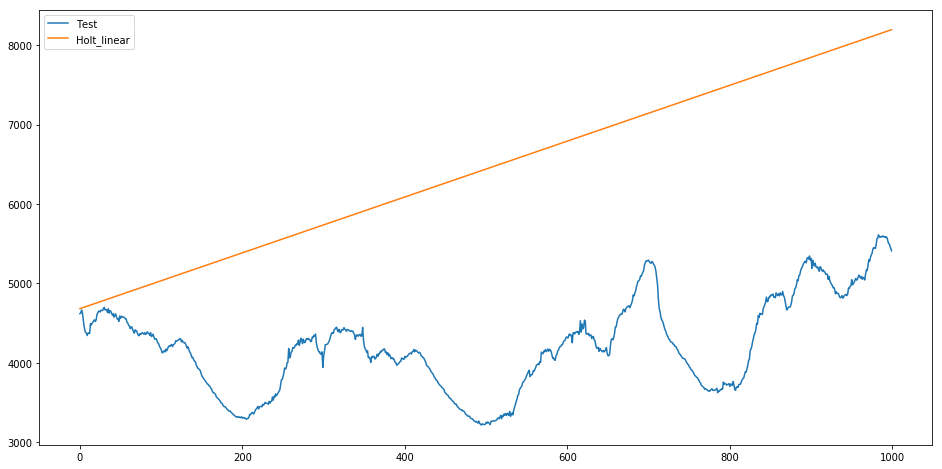

In [16]:
fit1 = Holt(train).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(test, label='Test')
plt.plot(y_hat, label='Holt_linear')
plt.legend(loc='best')
plt.show()

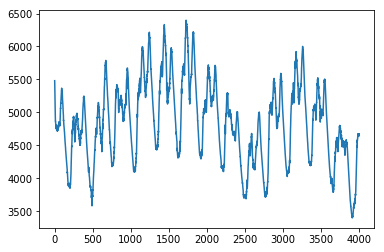

In [91]:
plt.plot(train);

In [144]:
train = data[-5000:-1000]
test = data[-1000:]
print(train.shape, test.shape)
df = pd.DataFrame(list(train)+list(test))
train_df = df.iloc[:4320]
test_df = df.iloc[4320:5000]

(4000,) (1000,)


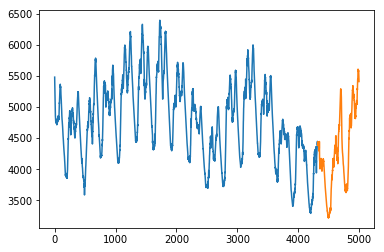

In [145]:
plt.plot(train_df)
plt.plot(test_df)

In [146]:
train_df.index.freq = "300S"

In [157]:
fit1 = ExponentialSmoothing(train_df,).fit()

In [158]:
y_hat_fore = fit1.forecast(len(test_df))
y_hat_pred = fit1.predict(start=test_df.index[0], end=test_df.index[-1])

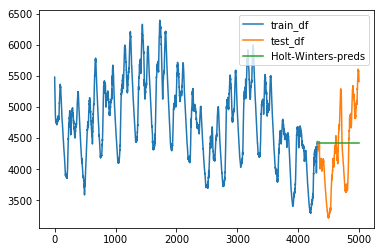

In [159]:
plt.plot(train_df.index, train_df, label='train_df')
plt.plot(test_df.index, test_df, label='test_df')
plt.plot(y_hat_pred.index, y_hat_pred, label='Holt-Winters-preds')
# plt.plot(y_hat_fore.index, y_hat_fore, label='Holt-Winters-fore')
plt.legend(loc='best')

In [141]:
train.index.freq

In [110]:
# df = pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/international-airline-passengers.csv')
pd.read_csv?

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/international-airline-passengers.csv', 
                 parse_dates=['Month'], 
                 index_col='Month',
                delimiter=';')

In [153]:
df.shape

(144, 1)

In [154]:
df.index.freq  = 'MS'

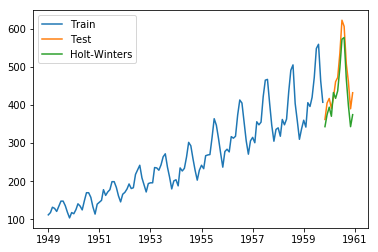

In [156]:

train, test = df.iloc[:130, 0], df.iloc[130:, 0]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
# pred = model.predict(start=test.index[0], end=test.index[-1])
pred = model.forecast(len(test))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred, label='Holt-Winters')
plt.legend(loc='best')

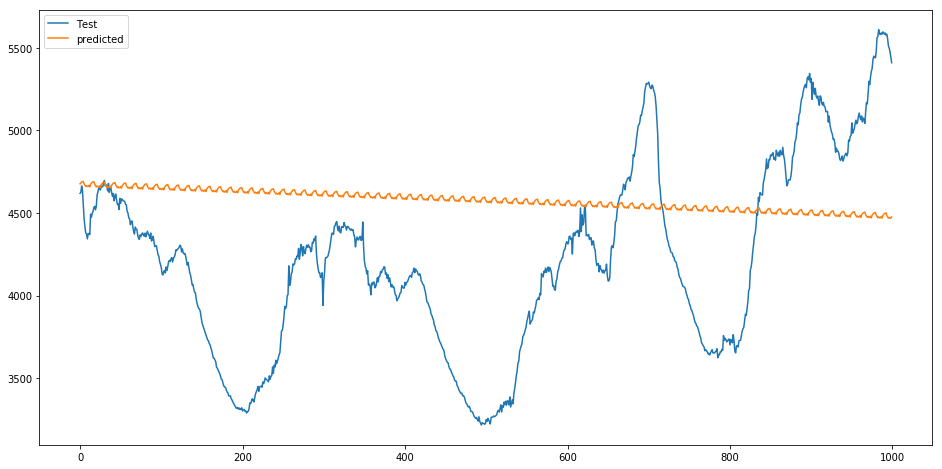

In [94]:
plt.figure(figsize=(16,8))
plt.plot(test, label='Test')`
plt.plot(y_hat, label='predicted')
plt.legend(loc='best')
plt.show()

In [29]:
model_fit.predict?

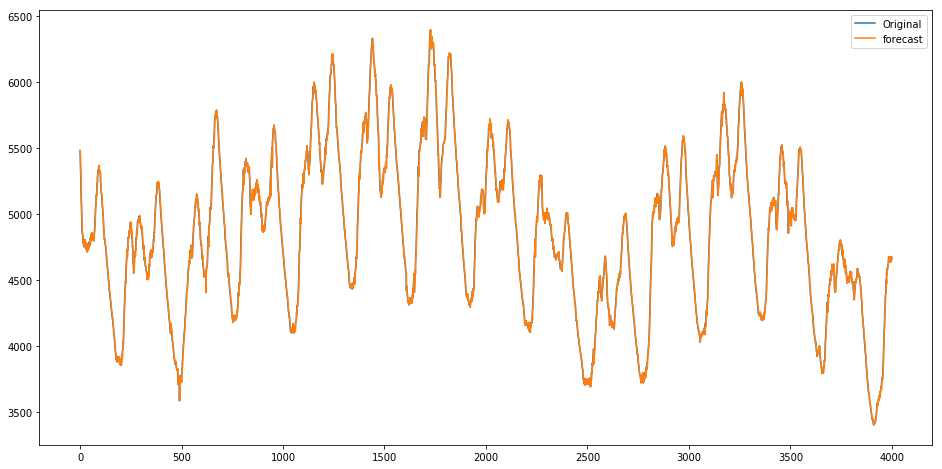

In [42]:
# model = SimpleExpSmoothing(train)
# model_fit = model.fit()
y_hat = model_fit.predict(start=0, end=len(train)-1)

plt.figure(figsize=(16,8))
plt.plot(train, label='Original')
plt.plot(y_hat, label='forecast')
plt.legend(loc='best')
plt.show()

In [45]:
error = np.sum(np.sqrt(np.square(y_hat - train)))
error 


98618.79000000001

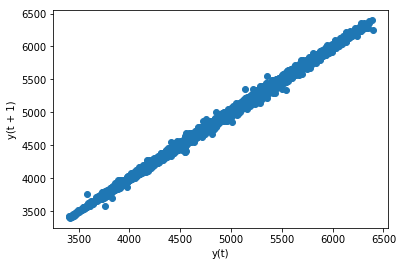

In [60]:
lag_plot(Series(train))
plt.show()

In [61]:
from pandas import Series
from pandas import DataFrame
from pandas import concat


values = DataFrame(train)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.998569
t+1  0.998569  1.000000


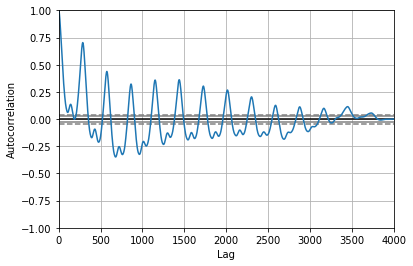

In [63]:

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(Series(train))
pyplot.show()

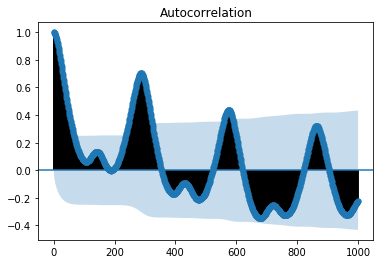

In [69]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(Series(train), lags=1000)
pyplot.show()

In [86]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# train autoregression
model = AR(Series(train))
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


Lag: 30
Coefficients: const    23.450470
L1.y      0.885883
L2.y      0.285234
L3.y      0.004677
L4.y      0.015790
L5.y     -0.077441
L6.y     -0.020104
L7.y      0.000651
L8.y     -0.068283
L9.y     -0.040268
L10.y     0.037925
L11.y     0.003891
L12.y    -0.014248
L13.y    -0.011406
L14.y    -0.025298
L15.y    -0.002199
L16.y    -0.002622
L17.y    -0.017924
L18.y     0.027793
L19.y    -0.005460
L20.y     0.010213
L21.y    -0.012160
L22.y     0.026682
L23.y     0.014367
L24.y     0.007166
L25.y     0.020788
L26.y    -0.048322
L27.y     0.014297
L28.y    -0.042132
L29.y     0.031253
L30.y    -0.003580
dtype: float64


In [82]:
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (list(predictions)[i], test[i]))
error = mean_squared_error(Series(test), predictions)
print('Test MSE: %.3f' % error)

predicted=4658.387341, expected=4619.240000
predicted=4659.750686, expected=4624.340000
predicted=4657.934109, expected=4664.190000
predicted=4660.226650, expected=4636.170000
predicted=4656.701982, expected=4549.750000
predicted=4658.652565, expected=4467.490000
predicted=4659.997215, expected=4416.810000
predicted=4661.922727, expected=4380.500000
predicted=4664.671496, expected=4373.340000
predicted=4665.905654, expected=4343.070000
predicted=4665.633963, expected=4373.630000
predicted=4667.943216, expected=4376.190000
predicted=4667.191547, expected=4369.220000
predicted=4670.902541, expected=4492.860000
predicted=4671.935343, expected=4474.800000
predicted=4674.789057, expected=4499.090000
predicted=4676.307600, expected=4508.780000
predicted=4678.943912, expected=4532.750000
predicted=4682.166977, expected=4540.760000
predicted=4683.499714, expected=4519.090000
predicted=4688.842281, expected=4539.900000
predicted=4689.875579, expected=4608.390000
predicted=4694.017897, expected=

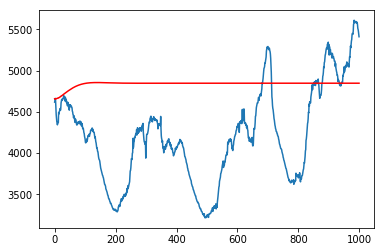

In [87]:

pyplot.plot(test)
pyplot.plot(list(predictions), color='red')
pyplot.show()

In [ ]:
import csv
dict={}
dates = ['01-10-2017.csv','02-10-2017.csv','03-10-2017.csv','04-10-2017.csv','05-10-2017.csv','06-10-2017.csv','07-10-2017.csv','08-10-2017.csv','09-10-2017.csv','10-10-2017.csv','11-10-2017.csv','12-10-2017.csv','13-10-2017.csv','14-10-2017.csv','15-10-2017.csv','16-10-2017.csv','17-10-2017.csv','18-10-2017.csv','19-10-2017.csv','20-10-2017.csv','21-10-2017.csv','22-10-2017.csv','23-10-2017.csv','24-10-2017.csv','25-10-2017.csv','26-10-2017.csv','27-10-2017.csv','28-10-2017.csv','29-10-2017.csv','30-10-2017.csv']
for i in range(len(dates)):
    dict[dates[i]] = []
    time = []
    for d in csv.DictReader(open(dates[i]), delimiter=','):
        time.append(d['time'])
        dict[dates[i]].append(float(d['value']))
n = len(dict[dates[len(dates)-1]])
m = len(dates)
alpha  = [0]*n
alphamin = ['value']+[0.1]*n
forecast =[[0]*n for i in range(m)]
forecast[1] = [dict[dates[0]][j] for j in range(n)]
for j in range(n):
    mse = [0]*9
    for k in range(1,10):
        alpha[j] = k*0.1
        for i in range(2,m):
            forecast[i][j] = (alpha[j]*dict[dates[i-1]][j]) + ((1 - alpha[j])*forecast[i-1][j])
        for i in range(1,m):
            mse[k-1] += (forecast[i][j] - dict[dates[i]][j])**2
    min = mse[0]
    for i in range(1,9):
        if mse[i]<min:
            min = mse[i]
            alphamin[j+1] = (i+1)*0.1
print(alphamin)

In [ ]:
import csv

dict={}
data = ['11-10-2017.csv','12-10-2017.csv','13-10-2017.csv','14-10-2017.csv','15-10-2017.csv','16-10-2017.csv','17-10-2017.csv','18-10-2017.csv','19-10-2017.csv','20-10-2017.csv','21-10-2017.csv','22-10-2017.csv','23-10-2017.csv','24-10-2017.csv','25-10-2017.csv','26-10-2017.csv','27-10-2017.csv','28-10-2017.csv','29-10-2017.csv','30-10-2017.csv','31-10-2017.csv']
for i in range(len(data)):
    dict[data[i]] = []
    time = []
    for d in csv.DictReader(open(data[i]), delimiter=','):
        time.append(d['time'])
        dict[data[i]].append(float(d['value']))
n = len(dict[data[len(data)-1]])
alpha = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.6000000000000001, 0.7000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.5, 0.6000000000000001, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6000000000000001, 0.5, 0.5, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.5, 0.6000000000000001, 0.5, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.7000000000000001, 0.7000000000000001, 0.6000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7000000000000001, 0.8, 0.7000000000000001, 0.8, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.8, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.8, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.8, 0.7000000000000001, 0.8, 0.8, 0.8, 0.7000000000000001, 0.8, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.8, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
forecast={}
forecast[data[1]] = [dict[data[0]][i] for i in range(len(dict[data[1]]))]
for j in range(2,len(data)):
    forecast[data[j]] = []
    for i in range(n):
        forecast[data[j]].append((alpha[i]*dict[data[j-1]][i]) + ((1 - alpha[i])*forecast[data[j-1]][i]))
for i in range(n):
    print(time[i]," : ",dict[data[len(data)-1]][i]," : ",forecast[data[len(data)-1]][i])
mse = 0
for i in range(n):
    mse += (dict[data[len(data)-1]][i] - forecast[data[len(data)-1]][i])**2
print((mse)**0.5)

In [ ]:
plt.plot(dict[data[len(data)-1]])
plt.plot(forecast[data[len(data)-1]])
plt.legend(['load', 'forecast'])
plt.show()